In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("🔍 EXPLORATION DES DONNÉES IQVIA FUSIONNÉES")
print("=" * 55)

🔍 EXPLORATION DES DONNÉES IQVIA FUSIONNÉES


In [3]:
# Cell 1: Chargement du dataset fusionné
df = pd.read_csv("../../data/cleaned/iqvia_fusionne_cleaned.csv")
df['date'] = pd.to_datetime(df['date'])

print(f"📊 Dataset fusionné : {df.shape}")
print(f"📅 Période : {df['date'].min()} à {df['date'].max()}")
print(f"👥 Groupes d'âge : {df['groupe_age'].nunique()}")
print(f"🗓️ Campagnes : {df['campagne'].nunique()}")

print(f"\n📈 Colonnes disponibles :")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

📊 Dataset fusionné : (1010, 14)
📅 Période : 2021-10-22 00:00:00 à 2025-01-28 00:00:00
👥 Groupes d'âge : 2
🗓️ Campagnes : 4

📈 Colonnes disponibles :
    1. date
    2. groupe_age
    3. campagne
    4. DOSES(J07E1)
    5. ACTE(VGP)
    6. annee
    7. mois
    8. jour_semaine
    9. semaine_annee
   10. DOSES(J07E1)_campagne
   11. ACTE(VGP)_campagne
   12. UNIVERS
   13. PHARMACIES
   14. POURCENTAGE


In [4]:
# Cell 2: Statistiques descriptives
print("\n📈 STATISTIQUES DESCRIPTIVES")
print("=" * 40)

display(df.describe())


📈 STATISTIQUES DESCRIPTIVES


,date,DOSES(J07E1),ACTE(VGP),annee,mois,jour_semaine,semaine_annee,DOSES(J07E1)_campagne,ACTE(VGP)_campagne,UNIVERS,PHARMACIES,POURCENTAGE
count,1010,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000
mean,2023-05-26 08:44:40.396039424,43311.018812,21831.462376,2022.835644,7.241584,2.992079,29.845545,1.085506e+07,5.857964e+06,20568.333333,17201.333333,84.333333
min,2021-10-22 00:00:00,2.000000,5.000000,2021.000000,1.000000,0.000000,1.000000,1.051043e+07,5.373898e+06,20286.000000,16766.000000,81.000000
25%,2022-02-25 00:00:00,842.000000,516.500000,2022.000000,2.000000,1.000000,5.000000,1.059165e+07,5.441705e+06,20360.750000,16811.000000,81.500000
50%,2023-02-17 00:00:00,10659.500000,7012.000000,2023.000000,10.000000,3.000000,43.000000,1.083530e+07,5.645127e+06,20585.000000,16946.000000,83.000000
75%,2024-02-08 00:00:00,52979.500000,25276.500000,2024.000000,11.000000,5.000000,48.000000,1.112341e+07,6.327432e+06,20771.750000,17655.500000,87.500000
max,2025-01-28 00:00:00,604048.000000,184509.000000,2025.000000,12.000000,6.000000,52.000000,1.121944e+07,6.554867e+06,20834.000000,17892.000000,89.000000
std,NaN,75776.463448,34661.088096,1.138008,4.867018,2.002955,21.179396,3.174481e+05,5.532787e+05,245.412849,541.010413,3.723797


In [5]:
# Cell 3: Analyse des valeurs manquantes
print("\n🔍 QUALITÉ DES DONNÉES")
print("=" * 30)

missing_data = df.isnull().sum()
print("Valeurs manquantes par colonne :")
for col, missing in missing_data.items():
    if missing > 0:
        print(f"⚠️ {col}: {missing} ({missing/len(df)*100:.1f}%)")
    else:
        print(f"✅ {col}: Aucune valeur manquante")


🔍 QUALITÉ DES DONNÉES
Valeurs manquantes par colonne :
✅ date: Aucune valeur manquante
✅ groupe_age: Aucune valeur manquante
✅ campagne: Aucune valeur manquante
✅ DOSES(J07E1): Aucune valeur manquante
✅ ACTE(VGP): Aucune valeur manquante
✅ annee: Aucune valeur manquante
✅ mois: Aucune valeur manquante
✅ jour_semaine: Aucune valeur manquante
✅ semaine_annee: Aucune valeur manquante
⚠️ DOSES(J07E1)_campagne: 1004 (99.4%)
⚠️ ACTE(VGP)_campagne: 1004 (99.4%)
⚠️ UNIVERS: 1004 (99.4%)
⚠️ PHARMACIES: 1004 (99.4%)
⚠️ POURCENTAGE: 1004 (99.4%)


In [6]:
# Cell 4: Analyse par campagne
print("\n🗓️ ANALYSE PAR CAMPAGNE")
print("=" * 30)

for campagne in sorted(df['campagne'].unique()):
    print(f"\n📅 {campagne}:")
    campagne_data = df[df['campagne'] == campagne]
    
    print(f"   📊 Observations : {len(campagne_data):,}")
    print(f"   📅 Période : {campagne_data['date'].min().strftime('%Y-%m-%d')} à {campagne_data['date'].max().strftime('%Y-%m-%d')}")
    print(f"   💉 Doses totales : {campagne_data['DOSES(J07E1)'].sum():,}")
    print(f"   🏥 Actes totaux : {campagne_data['ACTE(VGP)'].sum():,}")
    
    # Moyennes par groupe d'âge
    print(f"   👥 Moyennes par groupe d'âge :")
    for groupe in sorted(campagne_data['groupe_age'].unique()):
        groupe_data = campagne_data[campagne_data['groupe_age'] == groupe]
        doses_moyen = groupe_data['DOSES(J07E1)'].mean()
        actes_moyen = groupe_data['ACTE(VGP)'].mean()
        print(f"      - {groupe}: {doses_moyen:,.0f} doses/jour, {actes_moyen:,.0f} actes/jour")


🗓️ ANALYSE PAR CAMPAGNE

📅 2021-2022:
   📊 Observations : 260
   📅 Période : 2021-10-22 à 2022-02-28
   💉 Doses totales : 11,178,958
   🏥 Actes totaux : 4,475,885
   👥 Moyennes par groupe d'âge :
      - 65 ans et plus: 64,973 doses/jour, 26,694 actes/jour
      - moins de 65 ans: 21,019 doses/jour, 7,736 actes/jour

📅 2022-2023:
   📊 Observations : 268
   📅 Période : 2022-10-18 à 2023-02-28
   💉 Doses totales : 11,219,441
   🏥 Actes totaux : 5,373,892
   👥 Moyennes par groupe d'âge :
      - 65 ans et plus: 63,052 doses/jour, 30,526 actes/jour
      - moins de 65 ans: 20,676 doses/jour, 9,578 actes/jour

📅 2023-2024:
   📊 Observations : 270
   📅 Période : 2023-10-17 à 2024-02-28
   💉 Doses totales : 10,510,434
   🏥 Actes totaux : 5,645,132
   👥 Moyennes par groupe d'âge :
      - 65 ans et plus: 59,278 doses/jour, 32,035 actes/jour
      - moins de 65 ans: 18,577 doses/jour, 9,781 actes/jour

📅 2024-2025:
   📊 Observations : 212
   📅 Période : 2024-10-15 à 2025-01-28
   💉 Doses total

In [7]:
# Cell 5: Analyse par groupe d'âge
print("\n👥 ANALYSE PAR GROUPE D'ÂGE")
print("=" * 35)

age_stats = df.groupby('groupe_age').agg({
    'DOSES(J07E1)': ['count', 'mean', 'std', 'min', 'max', 'sum'],
    'ACTE(VGP)': ['mean', 'std', 'sum'],
    'date': ['min', 'max']
}).round(2)

print("Statistiques par groupe d'âge :")
display(age_stats)



👥 ANALYSE PAR GROUPE D'ÂGE
Statistiques par groupe d'âge :


DOSES(J07E1)                                            \
                       count      mean       std min     max       sum   
groupe_age                                                               
65 ans et plus           505  65407.20  99484.04   2  604048  33030637   
moins de 65 ans          505  21214.84  24900.65   2  121794  10713492   

                ACTE(VGP)                           date             
                     mean       std       sum        min        max  
groupe_age                                                           
65 ans et plus   33296.50  44907.76  16814734 2021-10-22 2025-01-28  
moins de 65 ans  10366.42  11182.25   5235043 2021-10-22 2025-01-28

In [8]:
# Cell 6: Analyse temporelle
print("\n📅 ANALYSE TEMPORELLE")
print("=" * 30)

# Agrégation mensuelle
monthly_stats = df.groupby(['annee', 'mois']).agg({
    'DOSES(J07E1)': 'sum',
    'ACTE(VGP)': 'sum'
}).reset_index()

print(f"📊 Périodes analysées : {len(monthly_stats)} mois")
print(f"📅 Période : {monthly_stats['mois'].min()} à {monthly_stats['mois'].max()}")

# Identification des pics
peak_months = monthly_stats.groupby('mois')['DOSES(J07E1)'].mean().sort_values(ascending=False)
print("\nMois avec les plus hautes doses :")
for i, (mois, doses) in enumerate(peak_months.head(5).items(), 1):
    print(f"{i}. Mois {mois}: {doses:,.0f} doses")


📅 ANALYSE TEMPORELLE
📊 Périodes analysées : 19 mois
📅 Période : 1 à 12

Mois avec les plus hautes doses :
1. Mois 11: 5,325,802 doses
2. Mois 10: 3,699,210 doses
3. Mois 12: 1,544,645 doses
4. Mois 1: 341,929 doses
5. Mois 2: 32,595 doses


In [9]:
# Cell 7: Corrélations
print("\n🔗 CORRÉLATIONS")
print("=" * 20)

# Corrélations entre les variables principales
corr_cols = ['DOSES(J07E1)', 'ACTE(VGP)', 'UNIVERS', 'PHARMACIES', 'POURCENTAGE']
correlations = df[corr_cols].corr()

print("Matrice de corrélation :")
display(correlations)



🔗 CORRÉLATIONS
Matrice de corrélation :


,DOSES(J07E1),ACTE(VGP),UNIVERS,PHARMACIES,POURCENTAGE
DOSES(J07E1),1.000000,0.944716,-0.829214,0.916879,0.900928
ACTE(VGP),0.944716,1.000000,-0.817697,0.921283,0.900692
UNIVERS,-0.829214,-0.817697,1.000000,-0.948724,-0.974029
PHARMACIES,0.916879,0.921283,-0.948724,1.000000,0.995658
POURCENTAGE,0.900928,0.900692,-0.974029,0.995658,1.000000



📊 VISUALISATIONS


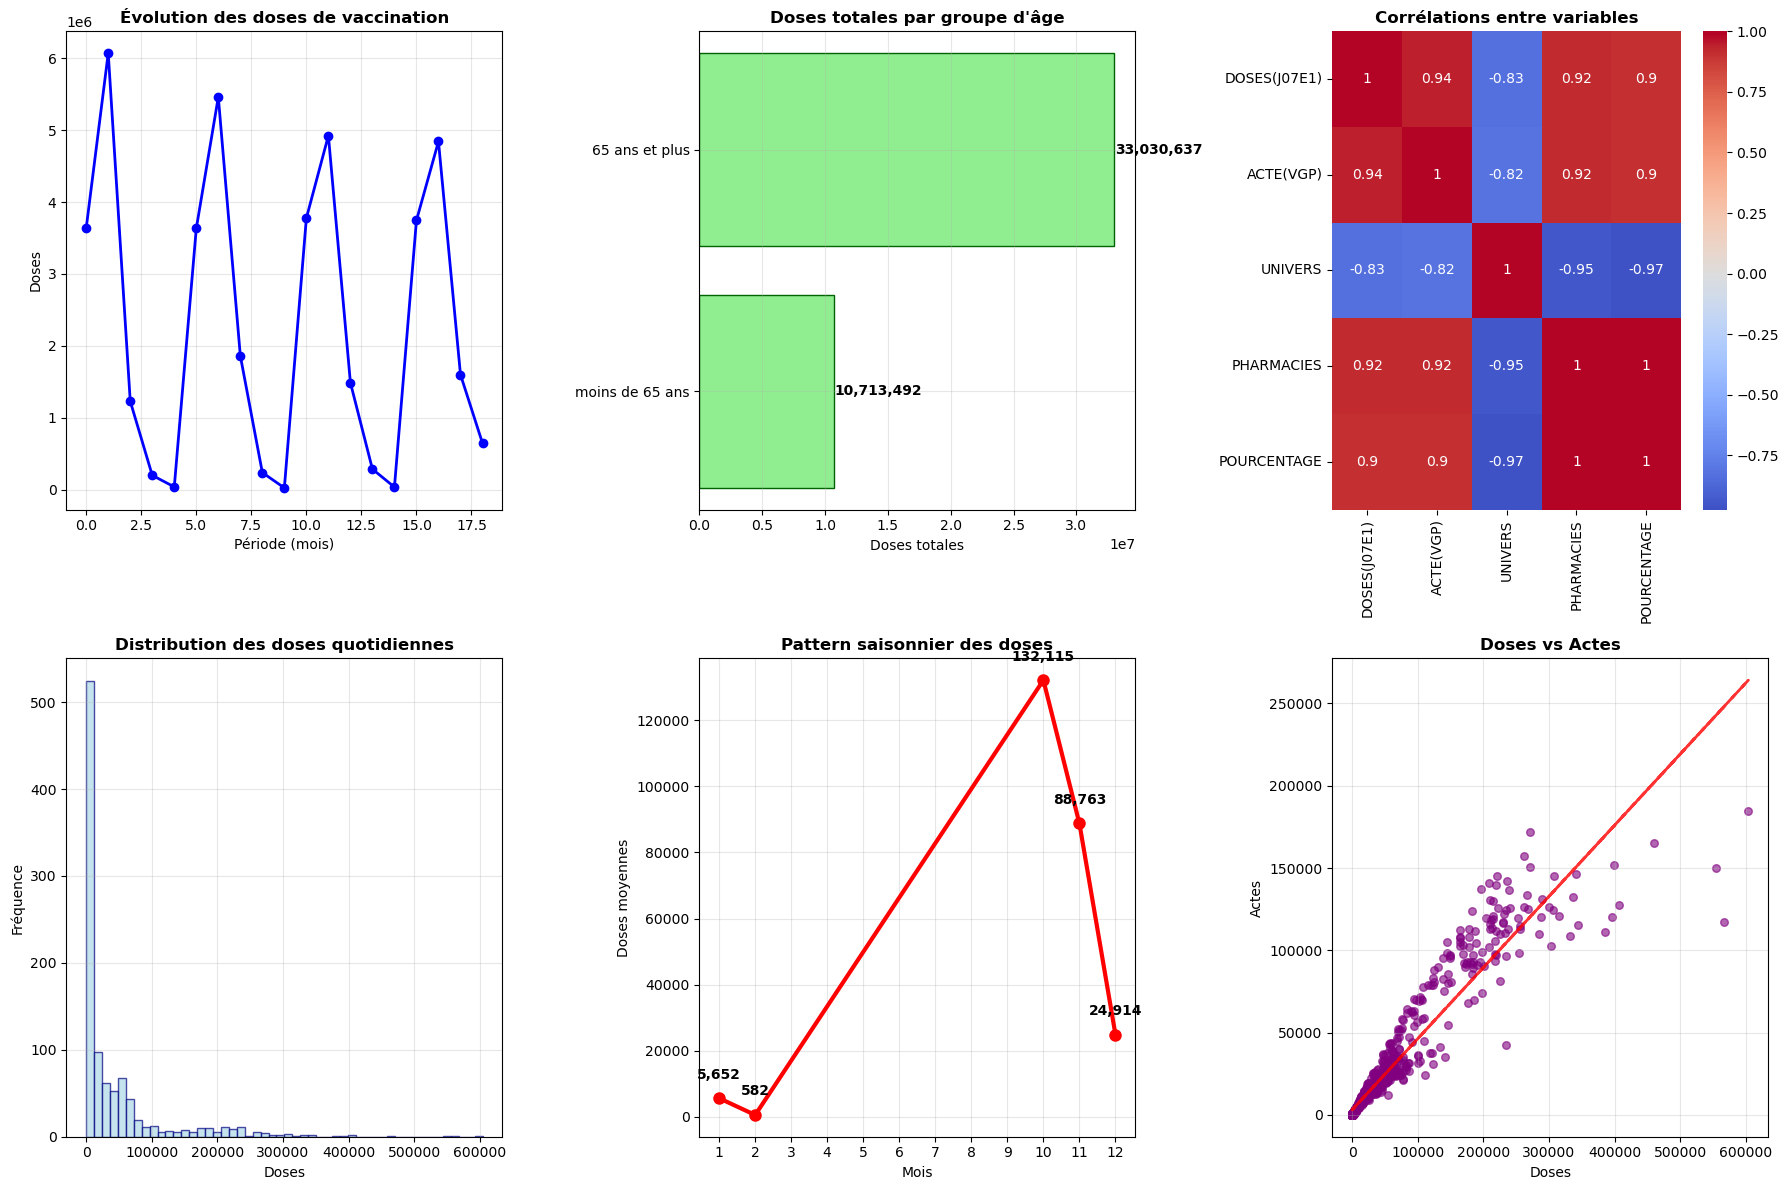

In [11]:
# Cell 8: Visualisations
print("\n📊 VISUALISATIONS")
print("=" * 25)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Évolution temporelle des doses
monthly_doses = df.groupby(['annee', 'mois'])['DOSES(J07E1)'].sum().reset_index()
axes[0, 0].plot(range(len(monthly_doses)), monthly_doses['DOSES(J07E1)'], marker='o', linewidth=2, color='blue')
axes[0, 0].set_title('Évolution des doses de vaccination', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Période (mois)')
axes[0, 0].set_ylabel('Doses')
axes[0, 0].grid(True, alpha=0.3)

# 2. Répartition par groupe d'âge
age_dist = df.groupby('groupe_age')['DOSES(J07E1)'].sum().sort_values(ascending=True)
bars = axes[0, 1].barh(range(len(age_dist)), age_dist.values, color='lightgreen', edgecolor='darkgreen')
axes[0, 1].set_yticks(range(len(age_dist)))
axes[0, 1].set_yticklabels(age_dist.index)
axes[0, 1].set_title('Doses totales par groupe d\'âge', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Doses totales')
axes[0, 1].grid(True, alpha=0.3)

# Ajout des valeurs sur les barres
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0, 1].text(width + 50000, bar.get_y() + bar.get_height()/2, 
                    f'{width:,.0f}', ha='left', va='center', fontweight='bold')

# 3. Corrélations
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0, ax=axes[0, 2])
axes[0, 2].set_title('Corrélations entre variables', fontsize=12, fontweight='bold')

# 4. Distribution des doses
axes[1, 0].hist(df['DOSES(J07E1)'], bins=50, alpha=0.7, color='lightblue', edgecolor='navy')
axes[1, 0].set_title('Distribution des doses quotidiennes', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Doses')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].grid(True, alpha=0.3)

# 5. Patterns saisonniers
monthly_pattern = df.groupby('mois')['DOSES(J07E1)'].mean()
axes[1, 1].plot(monthly_pattern.index, monthly_pattern.values, marker='o', linewidth=3, markersize=8, color='red')
axes[1, 1].set_title('Pattern saisonnier des doses', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Mois')
axes[1, 1].set_ylabel('Doses moyennes')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3)

# Ajout des valeurs sur les points
for i, (mois, doses) in enumerate(monthly_pattern.items()):
    axes[1, 1].text(mois, doses + 5000, f'{doses:,.0f}', ha='center', va='bottom', fontweight='bold')

# 6. Doses vs Actes
axes[1, 2].scatter(df['DOSES(J07E1)'], df['ACTE(VGP)'], alpha=0.6, s=30, color='purple')
axes[1, 2].set_title('Doses vs Actes', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Doses')
axes[1, 2].set_ylabel('Actes')
axes[1, 2].grid(True, alpha=0.3)

# Ligne de tendance
z = np.polyfit(df['DOSES(J07E1)'], df['ACTE(VGP)'], 1)
p = np.poly1d(z)
axes[1, 2].plot(df['DOSES(J07E1)'], p(df['DOSES(J07E1)']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


In [12]:
# Cell 9: Analyse comparative par campagne
print("\n📊 ANALYSE COMPARATIVE PAR CAMPAGNE")
print("=" * 45)

# Comparaison des performances par campagne
campagne_comparison = df.groupby('campagne').agg({
    'DOSES(J07E1)': ['sum', 'mean', 'max'],
    'ACTE(VGP)': ['sum', 'mean', 'max'],
    'date': ['min', 'max']
}).round(2)

print("Comparaison des campagnes :")
display(campagne_comparison)



📊 ANALYSE COMPARATIVE PAR CAMPAGNE
Comparaison des campagnes :


DOSES(J07E1)                   ACTE(VGP)                    \
                   sum      mean     max       sum      mean     max   
campagne                                                               
2021-2022     11178958  42995.99  604048   4475885  17214.94  184509   
2022-2023     11219441  41863.59  555059   5373892  20051.84  149739   
2023-2024     10510434  38927.53  460513   5645132  20907.90  165358   
2024-2025     10835296  51109.89  341944   6554868  30919.19  171854   

                date             
                 min        max  
campagne                         
2021-2022 2021-10-22 2022-02-28  
2022-2023 2022-10-18 2023-02-28  
2023-2024 2023-10-17 2024-02-28  
2024-2025 2024-10-15 2025-01-28

In [13]:
# Cell 10: Détection des pics de vaccination
print("\n📈 DÉTECTION DES PICS DE VACCINATION")
print("=" * 40)

# Calcul des seuils pour détecter les pics
doses_mean = df['DOSES(J07E1)'].mean()
doses_std = df['DOSES(J07E1)'].std()
high_threshold = doses_mean + 2 * doses_std
very_high_threshold = doses_mean + 3 * doses_std

print(f"📊 Statistiques des doses :")
print(f"   Moyenne : {doses_mean:,.0f}")
print(f"   Écart-type : {doses_std:,.0f}")
print(f"   Seuil élevé (+2σ) : {high_threshold:,.0f}")
print(f"   Seuil très élevé (+3σ) : {very_high_threshold:,.0f}")

# Identification des pics
high_activity = df[df['DOSES(J07E1)'] > high_threshold]
very_high_activity = df[df['DOSES(J07E1)'] > very_high_threshold]

print(f"\n📈 Périodes de forte activité :")
print(f"   >+2σ : {len(high_activity)} périodes ({len(high_activity)/len(df)*100:.1f}%)")
print(f"   >+3σ : {len(very_high_activity)} périodes ({len(very_high_activity)/len(df)*100:.1f}%)")

if len(very_high_activity) > 0:
    print(f"\n🗓️ Dates des pics les plus élevés :")
    top_pics = very_high_activity.nlargest(5, 'DOSES(J07E1)')
    for _, row in top_pics.iterrows():
        print(f"   {row['date'].strftime('%Y-%m-%d')} - {row['groupe_age']}: {row['DOSES(J07E1)']:,.0f} doses")



📈 DÉTECTION DES PICS DE VACCINATION
📊 Statistiques des doses :
   Moyenne : 43,311
   Écart-type : 75,776
   Seuil élevé (+2σ) : 194,864
   Seuil très élevé (+3σ) : 270,640

📈 Périodes de forte activité :
   >+2σ : 67 périodes (6.6%)
   >+3σ : 22 périodes (2.2%)

🗓️ Dates des pics les plus élevés :
   2021-10-26 - 65 ans et plus: 604,048 doses
   2021-10-22 - 65 ans et plus: 567,525 doses
   2022-10-18 - 65 ans et plus: 555,059 doses
   2023-10-17 - 65 ans et plus: 460,513 doses
   2021-10-27 - 65 ans et plus: 406,922 doses


In [14]:
# Cell 11: Rapport de synthèse
print("\n📋 RAPPORT DE SYNTHÈSE IQVIA")
print("=" * 40)

total_doses = df['DOSES(J07E1)'].sum()
total_actes = df['ACTE(VGP)'].sum()
avg_doses_per_day = df['DOSES(J07E1)'].mean()
avg_actes_per_day = df['ACTE(VGP)'].mean()

print(f"✅ DONNÉES GÉNÉRALES")
print(f"   📊 Observations : {len(df):,}")
print(f"   📅 Période : {df['date'].min().strftime('%Y-%m-%d')} à {df['date'].max().strftime('%Y-%m-%d')}")
print(f"   🗓️ Campagnes : {df['campagne'].nunique()}")
print(f"   👥 Groupes d'âge : {df['groupe_age'].nunique()}")

print(f"\n💉 VACCINATION")
print(f"   💉 Doses totales : {total_doses:,}")
print(f"   🏥 Actes totaux : {total_actes:,}")
print(f"   📊 Doses moyennes/jour : {avg_doses_per_day:,.0f}")
print(f"   📊 Actes moyens/jour : {avg_actes_per_day:,.0f}")

print(f"\n🎯 INSIGHTS CLÉS")
print(f"   📈 Pic saisonnier : Mois {peak_months.index[0]} ({peak_months.iloc[0]:,.0f} doses)")
print(f"   👥 Groupe principal : {age_dist.index[-1]} ({age_dist.iloc[-1]:,} doses)")
print(f"   🔗 Corrélation doses-actes : {correlations.loc['DOSES(J07E1)', 'ACTE(VGP)']:.3f}")
print(f"   📊 Variabilité : Écart-type de {doses_std:,.0f} doses")

print(f"\n🎉 DONNÉES IQVIA PRÊTES POUR LA MODÉLISATION !")
print("=" * 55)
print("✅ Dataset fusionné exploré et validé")
print("✅ Patterns temporels identifiés")
print("✅ Corrélations analysées")
print("✅ Prêt pour la fusion avec SURSAUD")


📋 RAPPORT DE SYNTHÈSE IQVIA
✅ DONNÉES GÉNÉRALES
   📊 Observations : 1,010
   📅 Période : 2021-10-22 à 2025-01-28
   🗓️ Campagnes : 4
   👥 Groupes d'âge : 2

💉 VACCINATION
   💉 Doses totales : 43,744,129
   🏥 Actes totaux : 22,049,777
   📊 Doses moyennes/jour : 43,311
   📊 Actes moyens/jour : 21,831

🎯 INSIGHTS CLÉS
   📈 Pic saisonnier : Mois 11 (5,325,802 doses)
   👥 Groupe principal : 65 ans et plus (33,030,637 doses)
   🔗 Corrélation doses-actes : 0.945
   📊 Variabilité : Écart-type de 75,776 doses

🎉 DONNÉES IQVIA PRÊTES POUR LA MODÉLISATION !
✅ Dataset fusionné exploré et validé
✅ Patterns temporels identifiés
✅ Corrélations analysées
✅ Prêt pour la fusion avec SURSAUD
